# SpaceRocks

### Vectorized coordinate transformation and ephemeris calculation with robust unit handling.

To install, simply `pip install spacerocks`

In [1]:
from spacerocks import SpaceRock, Propagate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You can also pass in just a single object or an array of objects. I'll try all of the TNOs reported to the MPC. I specified an observatory code, so a topocentric correction will be applied to the Earth's position.

In [2]:
df = pd.read_json('/Users/kjnapier/Desktop/mpcorb_extended.json')
df = df[df.a >= 30]

In [9]:
rocks = SpaceRock(a=df.a.values, 
                  e=df.e.values, 
                  inc=df.i.values, 
                  arg=df.Peri.values, 
                  node=df.Node.values, 
                  t_peri=df.Tp.values, 
                  obsdate=df.Epoch.values,
                  H=df.H.values, 
                  name=df.Principal_desig.values.astype(str),
                  input_coordinates='keplerian',
                  input_frame='heliocentric',
                  input_angles='degrees',
                  obscode='W84',
                  calc_equa=True)
rocks = rocks.to_bary()

In [10]:
futobs = Propagate(rocks, obsdates=np.array([2460000.5]), model=1, gr=False, add_pluto=False)

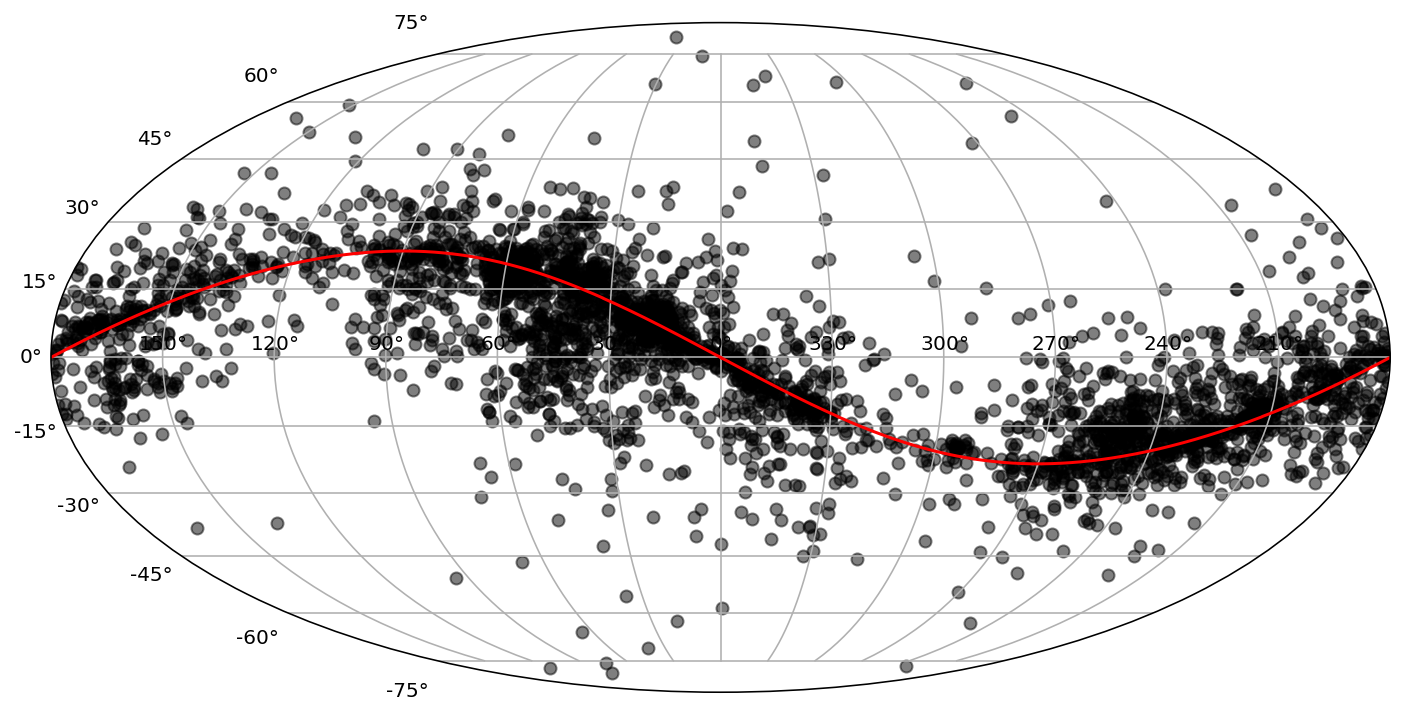

In [11]:
futobs.plot_radec();

---